### CNN Training in Frequency Domain

In [ ]:
import preprocessor.frequency_preprocessor as preprocessor
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.preprocess(True, True, True)
print(X_train.shape)

Load CNN model

In [46]:
from ia.model.cnn.frequency_cnn import FrequencyCNN
frequency_cnn = FrequencyCNN(input_shape=(X_train[0].shape))

In [47]:
frequency_cnn.compile()

In [48]:
NR_EPOCHS = 100
BATCH_SIZE = 250

In [49]:
history = frequency_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/100
12/12 [==============================] - 2s 93ms/step - loss: 0.6653 - accuracy: 0.5388 - val_loss: 0.6483 - val_accuracy: 0.5780
Epoch 2/100
12/12 [==============================] - 0s 39ms/step - loss: 0.6246 - accuracy: 0.6758 - val_loss: 0.5989 - val_accuracy: 0.7187
Epoch 3/100
12/12 [==============================] - 0s 36ms/step - loss: 0.5769 - accuracy: 0.7375 - val_loss: 0.5712 - val_accuracy: 0.7270
Epoch 4/100
12/12 [==============================] - 0s 39ms/step - loss: 0.5261 - accuracy: 0.7724 - val_loss: 0.5445 - val_accuracy: 0.7535
Epoch 5/100
12/12 [==============================] - 0s 38ms/step - loss: 0.4796 - accuracy: 0.7974 - val_loss: 0.5233 - val_accuracy: 0.7660
Epoch 6/100
12/12 [==============================] - 0s 36ms/step - loss: 0.4466 - accuracy: 0.8164 - val_loss: 0.5138 - val_accuracy: 0.7758
Epoch 7/100
12/12 [==============================] - 0s 36ms/step - loss: 0.3956 - accuracy: 0.8414 - val_loss: 0.6278 - val_accuracy: 0.7479
Epoch 

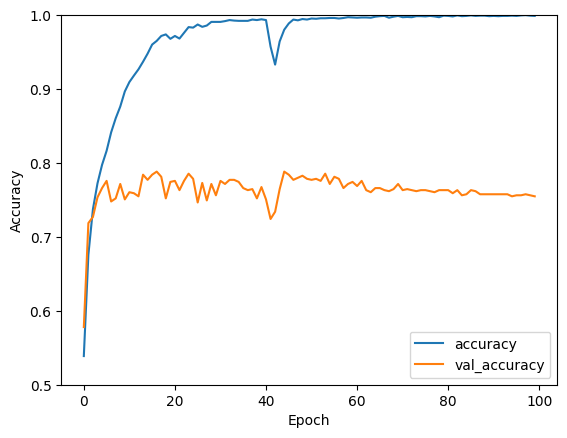

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [51]:
frequency_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 16, 32)            61568     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 5, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_4 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                      

In [52]:
import numpy as np
predictions = frequency_cnn.model.predict(X_test)
predictions = np.array([prediction > 0.5 for prediction in predictions])

for i in range(len(y_test)):
    print("PREDICTION: " + str(predictions[i] > 0.5) + " | " +  "REAL: " + str(y_test[i]))

4/4 [==============================] - 0s 2ms/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: Fal

In [53]:
test_loss, test_acc = frequency_cnn.model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

4/4 [==============================] - 0s 2ms/step - loss: 1.9303 - accuracy: 0.8725
Test accuracy: 0.8725489974021912
Test loss: 1.9302810430526733


### Metrics:

In [54]:
from ia.metrics.metrics import Metrics
metrics = Metrics(y_test, predictions, frequency_cnn.name(), "frequency")
metrics.all_metrics()
metrics.metrics_to_database()

True Positives: 44
True Negatives: 45
False Positives: 7
False Negatives: 6
total Samples: 102
Accuracy: 0.8725490196078431
Precision: 0.8627450980392157
Sensitivity: 0.88
Specificity: 0.8653846153846154
TPR: 0.8627450980392157
FPR: 0.1346153846153846
F1-Score: 0.8762586708435892


ROC curve

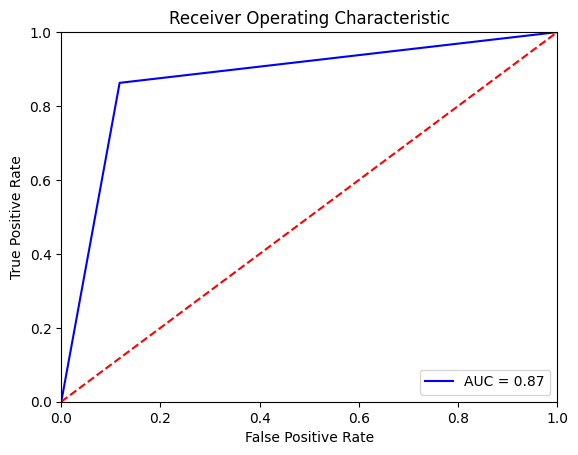

In [55]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()